In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.ensemble import EasyEnsembleClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Specify the path to the downloaded dataset file on your local machine
file_path = "breast+cancer+wisconsin+original/breast-cancer-wisconsin.data"


In [41]:
# Define column names for the dataset
column_names = ["Sample_Code_Number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape",
                "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli",
                "Mitoses", "Class"]

In [42]:
# Read the dataset file into a pandas DataFrame
df = pd.read_csv(file_path, names=column_names)

In [43]:
# Remove rows with missing values ('?') in the "Bare Nuclei" column
df = df[df['Bare_Nuclei'] != '?']


In [44]:
# Reset the index of the DataFrame after removing rows
df = df.reset_index(drop=True)


In [45]:
# Remove the "Sample Code Number" column
df.drop("Sample_Code_Number", axis=1, inplace=True)

In [46]:
# Replace 2 with 0 and 4 with 1 in the 'Class' column
df['Class'] = df['Class'].replace({2: 0, 4: 1})

In [47]:
# Prepare the Data
# Separate features and target variable
X = df.drop("Class", axis=1)  # Features
y = df["Class"]  # Target variable

In [48]:
# Initialize XGBoost as the base classifier
xgb_base_classifier = XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of each tree
    learning_rate=0.1, # Learning rate
    subsample=0.8,     # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    random_state=1     # Random state for reproducibility
)

In [49]:
# Initialize EasyEnsembleClassifier with random state 13
easy_ensemble = EasyEnsembleClassifier(n_estimators=5, random_state=1)


In [50]:
# Specify the number of cross-validation folds (e.g., 5-fold cross-validation)
n_splits = 3
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)


In [51]:
# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(easy_ensemble, X, y, cv=cv, scoring='accuracy')


In [52]:
# Print the accuracy for each fold during cross-validation
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.969298
Fold 2: 0.947368
Fold 3: 0.982379


In [53]:
# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")

Mean Accuracy: 0.966349
Standard Deviation: 0.014444


In [58]:
# Split the data into 60% training and 40% testing with a fixed random state (1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=13)

In [59]:
# Fit the EasyEnsembleClassifier on the training data
easy_ensemble.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=5, random_state=1)

In [60]:
# Use the trained model to make predictions on the test data
y_pred = easy_ensemble.predict(X_test)



Classification Report:
              precision    recall  f1-score   support

           0     0.9886    0.9775    0.9831       178
           1     0.9592    0.9792    0.9691        96

    accuracy                         0.9781       274
   macro avg     0.9739    0.9783    0.9761       274
weighted avg     0.9783    0.9781    0.9782       274



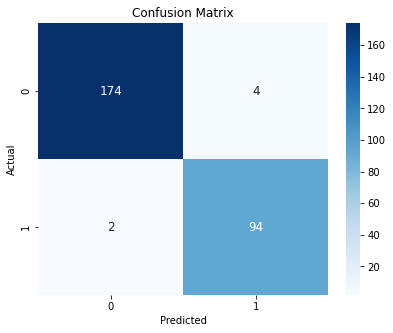

In [57]:
# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(report)
# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()